In [56]:
import glob
import re

import numpy as np
import os

In [179]:
times = None
results = None

for i in range(1, 9):
    if i == 6:
        continue
    if times is None:
        times = np.load(f"results2/times{i}.npy")
        results = np.load(f"results2/results{i}.npy").astype(int)
    else:
        cur_times = np.load(f"results2/times{i}.npy")
        times = np.concatenate((times, cur_times))
        cur_results = np.load(f"results2/results{i}.npy").astype(int)
        results = np.concatenate((results, cur_results))
times

array([[[1.17540359e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [1.01804733e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [1.11341476e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [5.26672840e-01, 7.44180679e-02, 4.58717346e-04, 8.34677219e-02]],

       [[6.72340393e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [1.94311142e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [1.15437593e+01, 1.67337728e+00, 1.54599428e-01, 3.01507759e+00],
        [1.30802586e+01, 2.12897491e+00, 4.26936150e-02, 3.38003492e+00]],

       [[4.04977798e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [9.82284546e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [2.85587931e+00, 2.60960340e-01, 5.11646271e-04, 1.58182406e+00],
        [3.54345083e+00, 3.13778877e-01, 6.38484955e-04, 1.97736597e+00]],

       ...,

       [[4.90903854e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [1.16825104

In [91]:
sample_portion_list = [0.25, 0.5, 0.75, 1.0]
num_queries = 70

# new_times = times.transpose((1, 0, 2))
# avg_times = []
# std_times = []
# for i, sample_portion in enumerate(sample_portion_list):
#     avg = np.average(new_times[i], axis=0)
#     std = np.std(new_times[i], axis=0)
#     avg_times.append(avg)
#     std_times.append(std)
# avg_times = np.array(avg_times).transpose()
# std_times = np.array(std_times).transpose()

In [92]:
# avg_times

In [93]:
# std_times

In [94]:
times_total = times[:, :, 0]
times_total

array([[1.17540359e-04, 1.01804733e-04, 1.11341476e-04, 5.26672840e-01],
       [6.72340393e-04, 1.94311142e-04, 1.15437593e+01, 1.30802586e+01],
       [4.04977798e-02, 9.82284546e-05, 2.85587931e+00, 3.54345083e+00],
       [3.07130814e-03, 1.42372799e+00, 1.63567305e+00, 1.98672152e+00],
       [2.68917322e+00, 5.67565799e+00, 8.29494882e+00, 1.17932365e+01],
       [1.17563868e+00, 2.02649617e+00, 3.31457114e+00, 3.65922117e+00],
       [4.57048416e-03, 1.13725662e-04, 7.48255014e-01, 7.14800596e-01],
       [1.04284286e-03, 1.15844488e-01, 2.92539597e-04, 1.11579418e-01],
       [1.67818069e-01, 3.35184813e-01, 1.24740887e+00, 1.59576941e+00],
       [1.01834369e+00, 2.15600514e+00, 9.45197034e+00, 3.26853905e+01],
       [9.13153887e+00, 2.08956046e+01, 5.95984895e+01, 1.03218913e+02],
       [1.18730736e+00, 6.12806892e+00, 3.59645605e+01, 4.12009764e+01],
       [1.12255335e-01, 8.32080841e-05, 1.65095615e+00, 1.99490070e+00],
       [2.38752365e-03, 5.01811266e-01, 7.37190247e

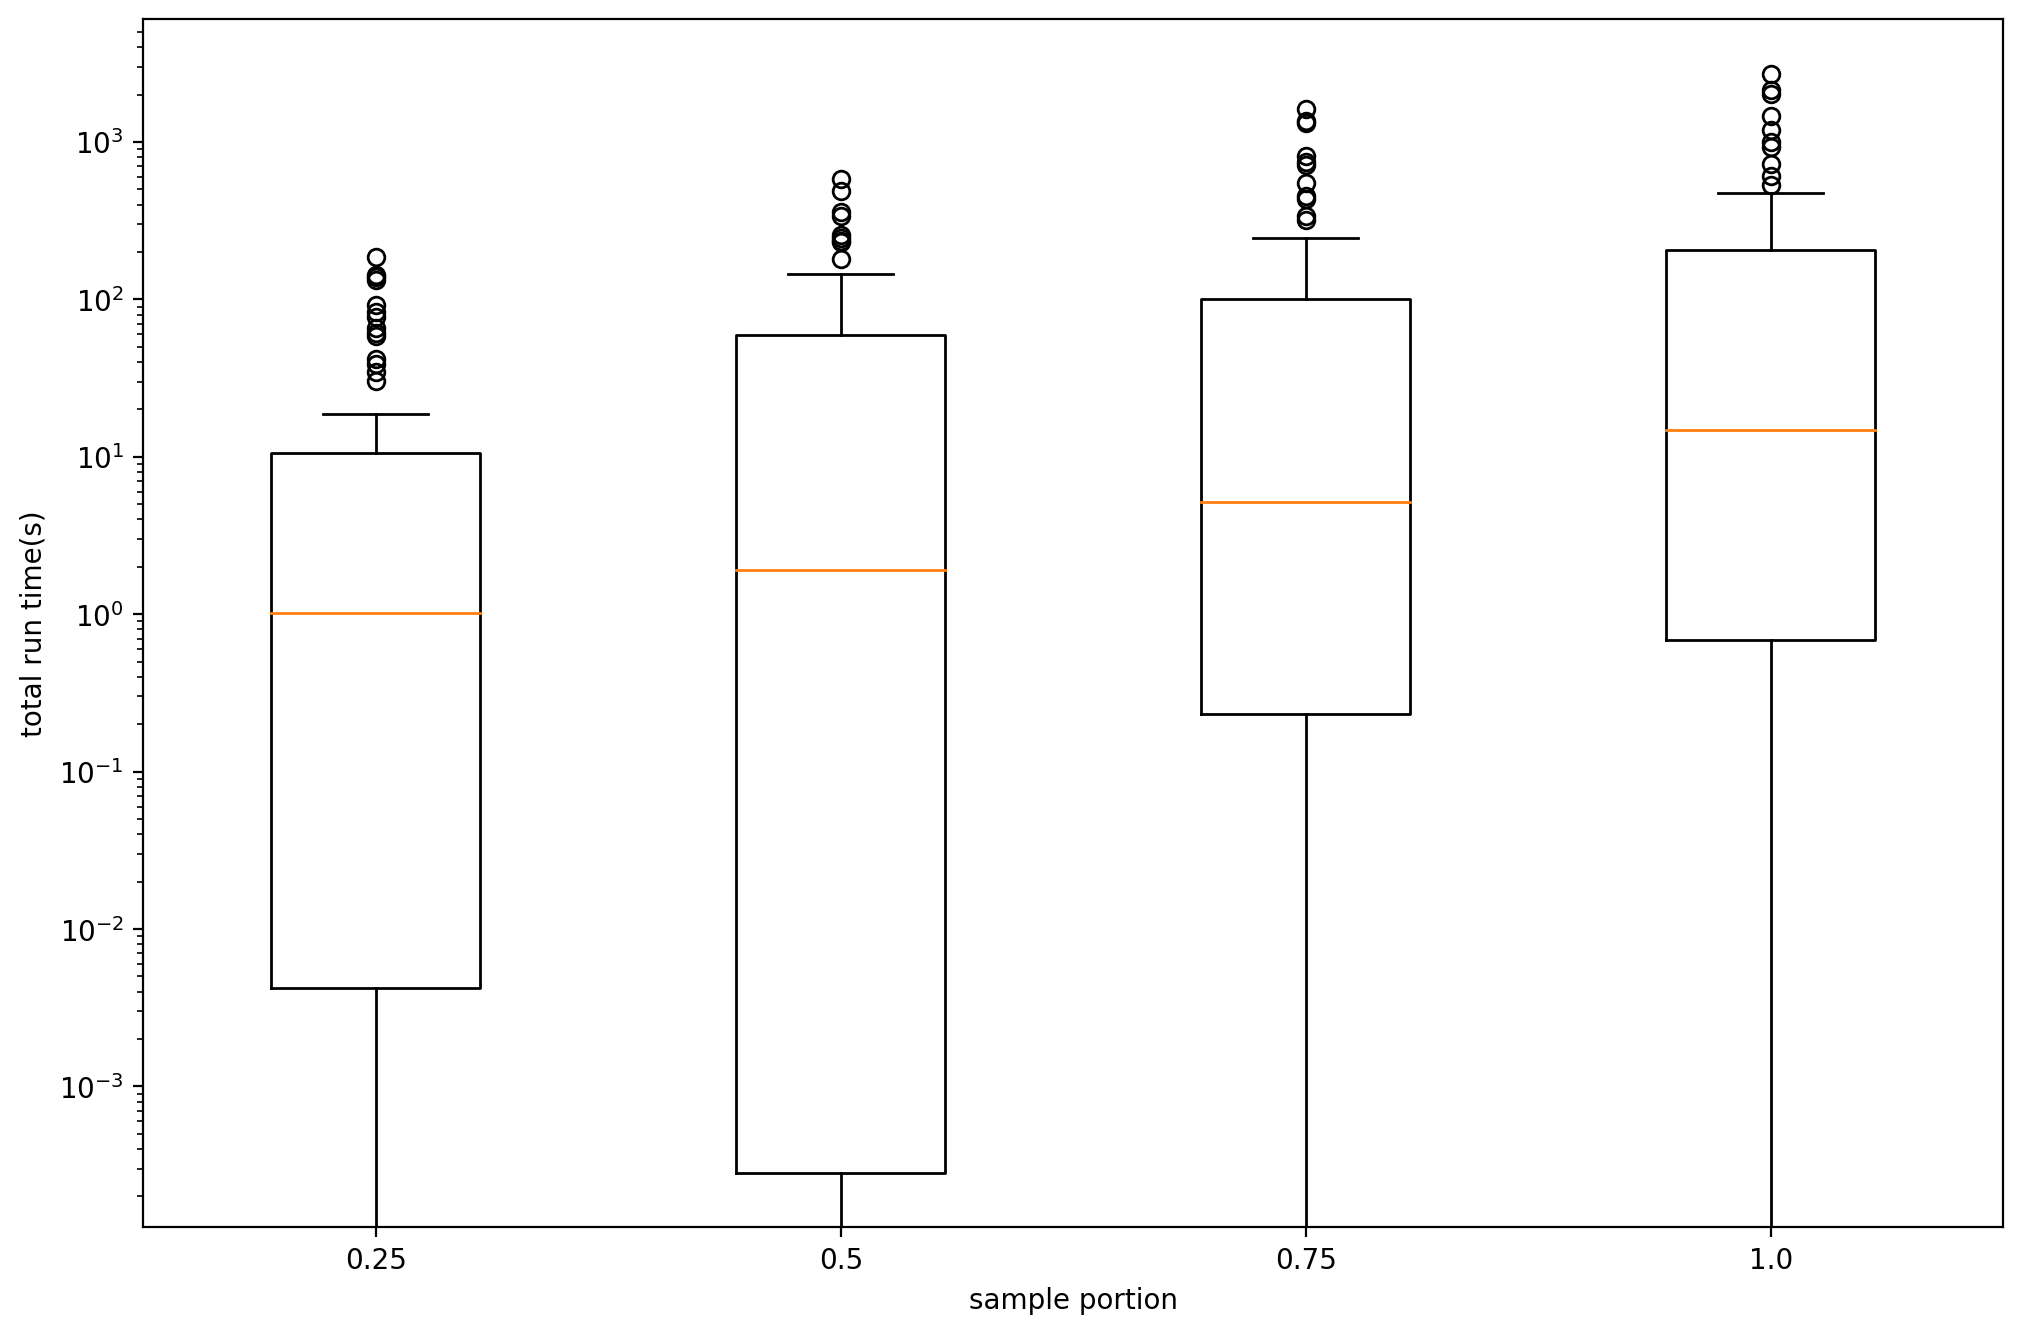

In [83]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 200

plt.boxplot(times_total)
plt.yscale("log")
plt.xlabel("sample portion")
plt.ylabel("total run time(s)")
plt.xticks([1, 2, 3, 4], [str(x) for x in sample_portion_list])
plt.show()

In [89]:
(times_total[:, 3] > 300).sum()

13

In [321]:
import glob
import re

times_files = glob.glob("test_result/times*.npy")
results_files = glob.glob("test_result/results*.npy")

results_list = []
queries_with_zero_views = []
for f in results_files:
    result = np.load(f).astype(int)
    query_name = re.search("test_result/results_jp_(\d+)\.npy", f)
    query_name = query_name.group(1)

    if result[0][0] == 0:
        queries_with_zero_views.append(query_name)
    else:
        results_list.append(result)

times_list = []
times_100 = {}
for f in times_files:
    time = np.load(f)
    query_name = re.search("test_result/times_jp_(\d+)\.npy", f)
    query_name = query_name.group(1)
    times_100[query_name] = time[3, 0]

    if query_name not in queries_with_zero_views:
        times_list.append(time)

times = np.array(times_list)
results = np.array(results_list)

# times_total = times[:, :, 0]
# times_total
print(times.shape)
print(results.shape)

(53, 4, 7)
(53, 4, 8)


In [318]:
# times_total = times[:, :, 0]
# times_total[:,3]
# np.save(file="total_time_4c.npy", arr=times_total[:,3])
# times_100
# with open("total_time_4c_by_name.txt", "w") as f:
#     for name, value in times_100.items():
#         f.write(f"{name},{str(value)}\n")
#     f.write("313,\n")
#     f.write("356,\n")
import json
with open("total_time_4c_by_name.json", "w") as f:
    json.dump(times_100, f)

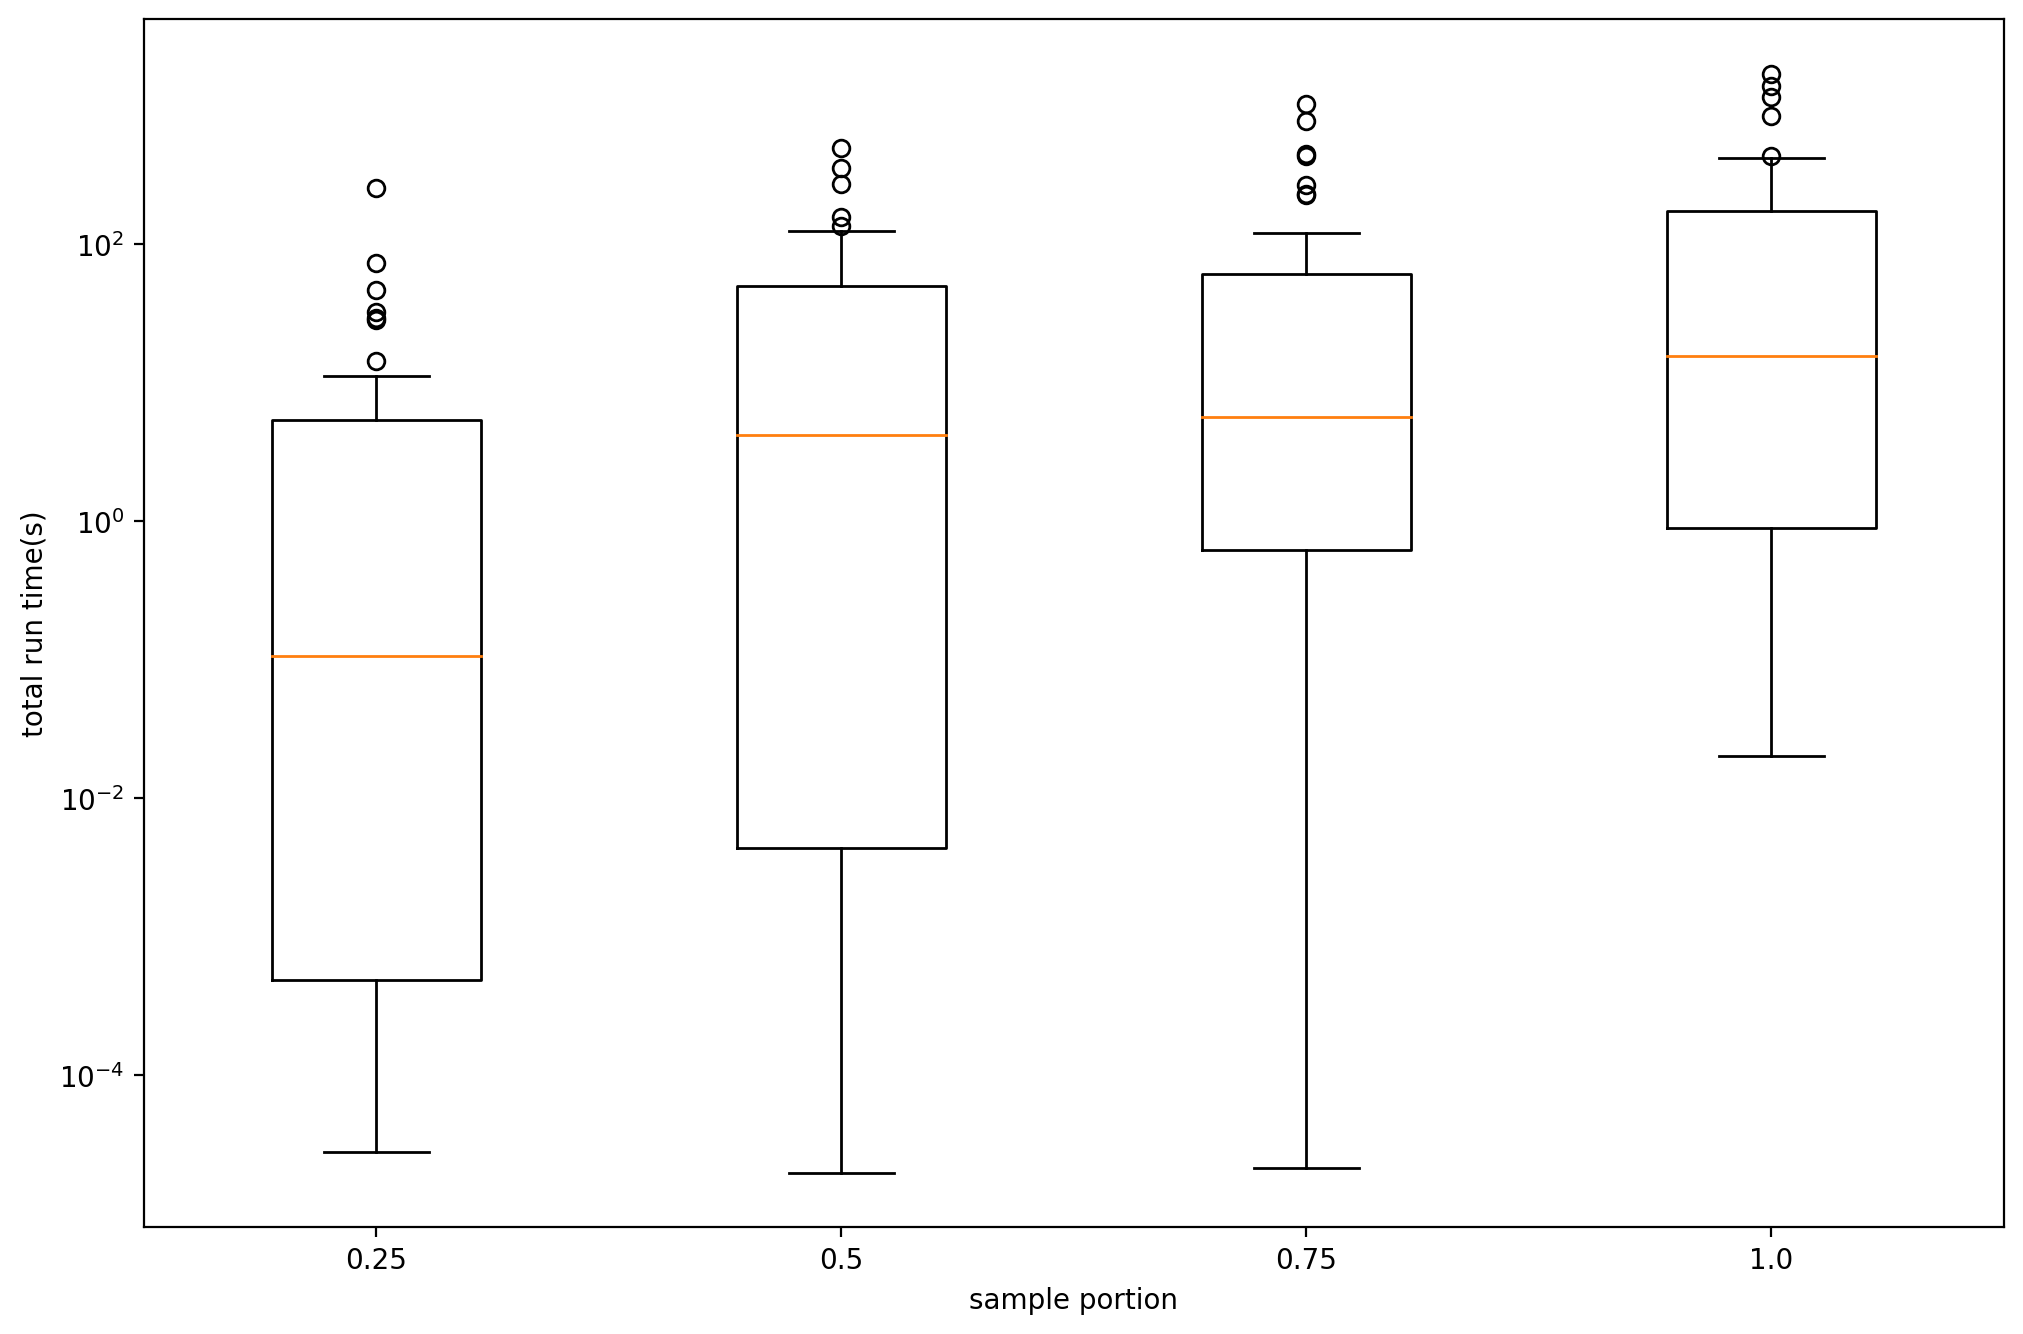

In [111]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 200

plt.boxplot(times_total)
plt.yscale("log")
plt.xlabel("sample portion")
plt.ylabel("total run time(s)")
plt.xticks([1, 2, 3, 4], [str(x) for x in sample_portion_list])
plt.show()

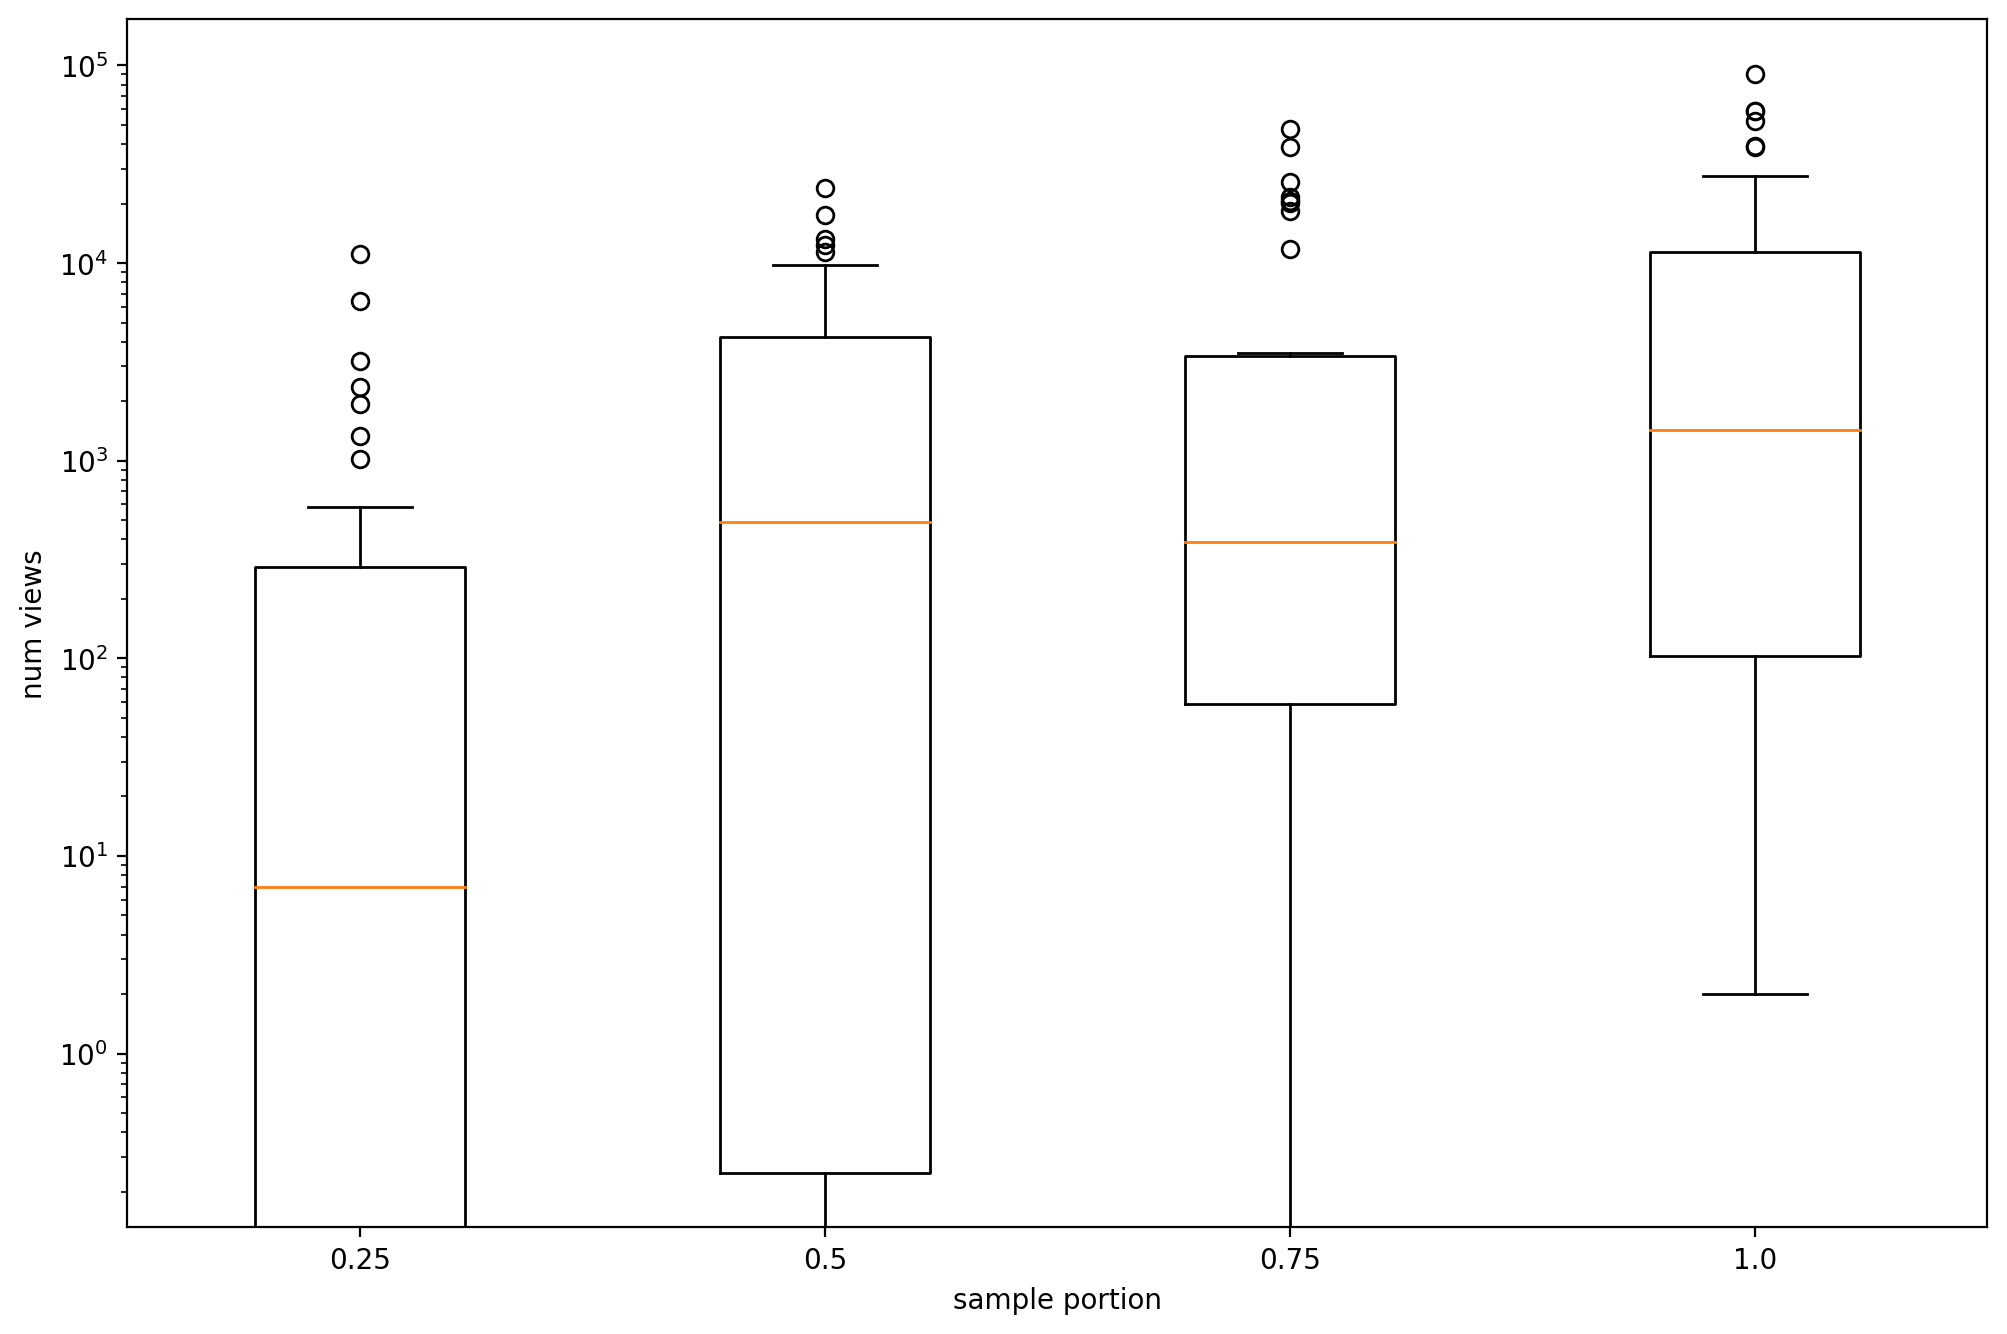

In [139]:
num_views = results[:, :, 0]
avg_num_views = np.average(num_views, axis=0)
std_num_views = np.std(num_views, axis=0)

# plt.bar(sample_portion_list, avg_num_views, yerr = std_num_views, width = 0.1)
plt.boxplot(num_views)
plt.yscale("log")
plt.xlabel("sample portion")
plt.ylabel("num views")
plt.xticks([1, 2, 3, 4], [str(x) for x in sample_portion_list])
plt.show()

/var/folders/gh/y8h9y_296_z0q22mbml76b000000gn/T/ipykernel_2043/1484744307.py:38: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


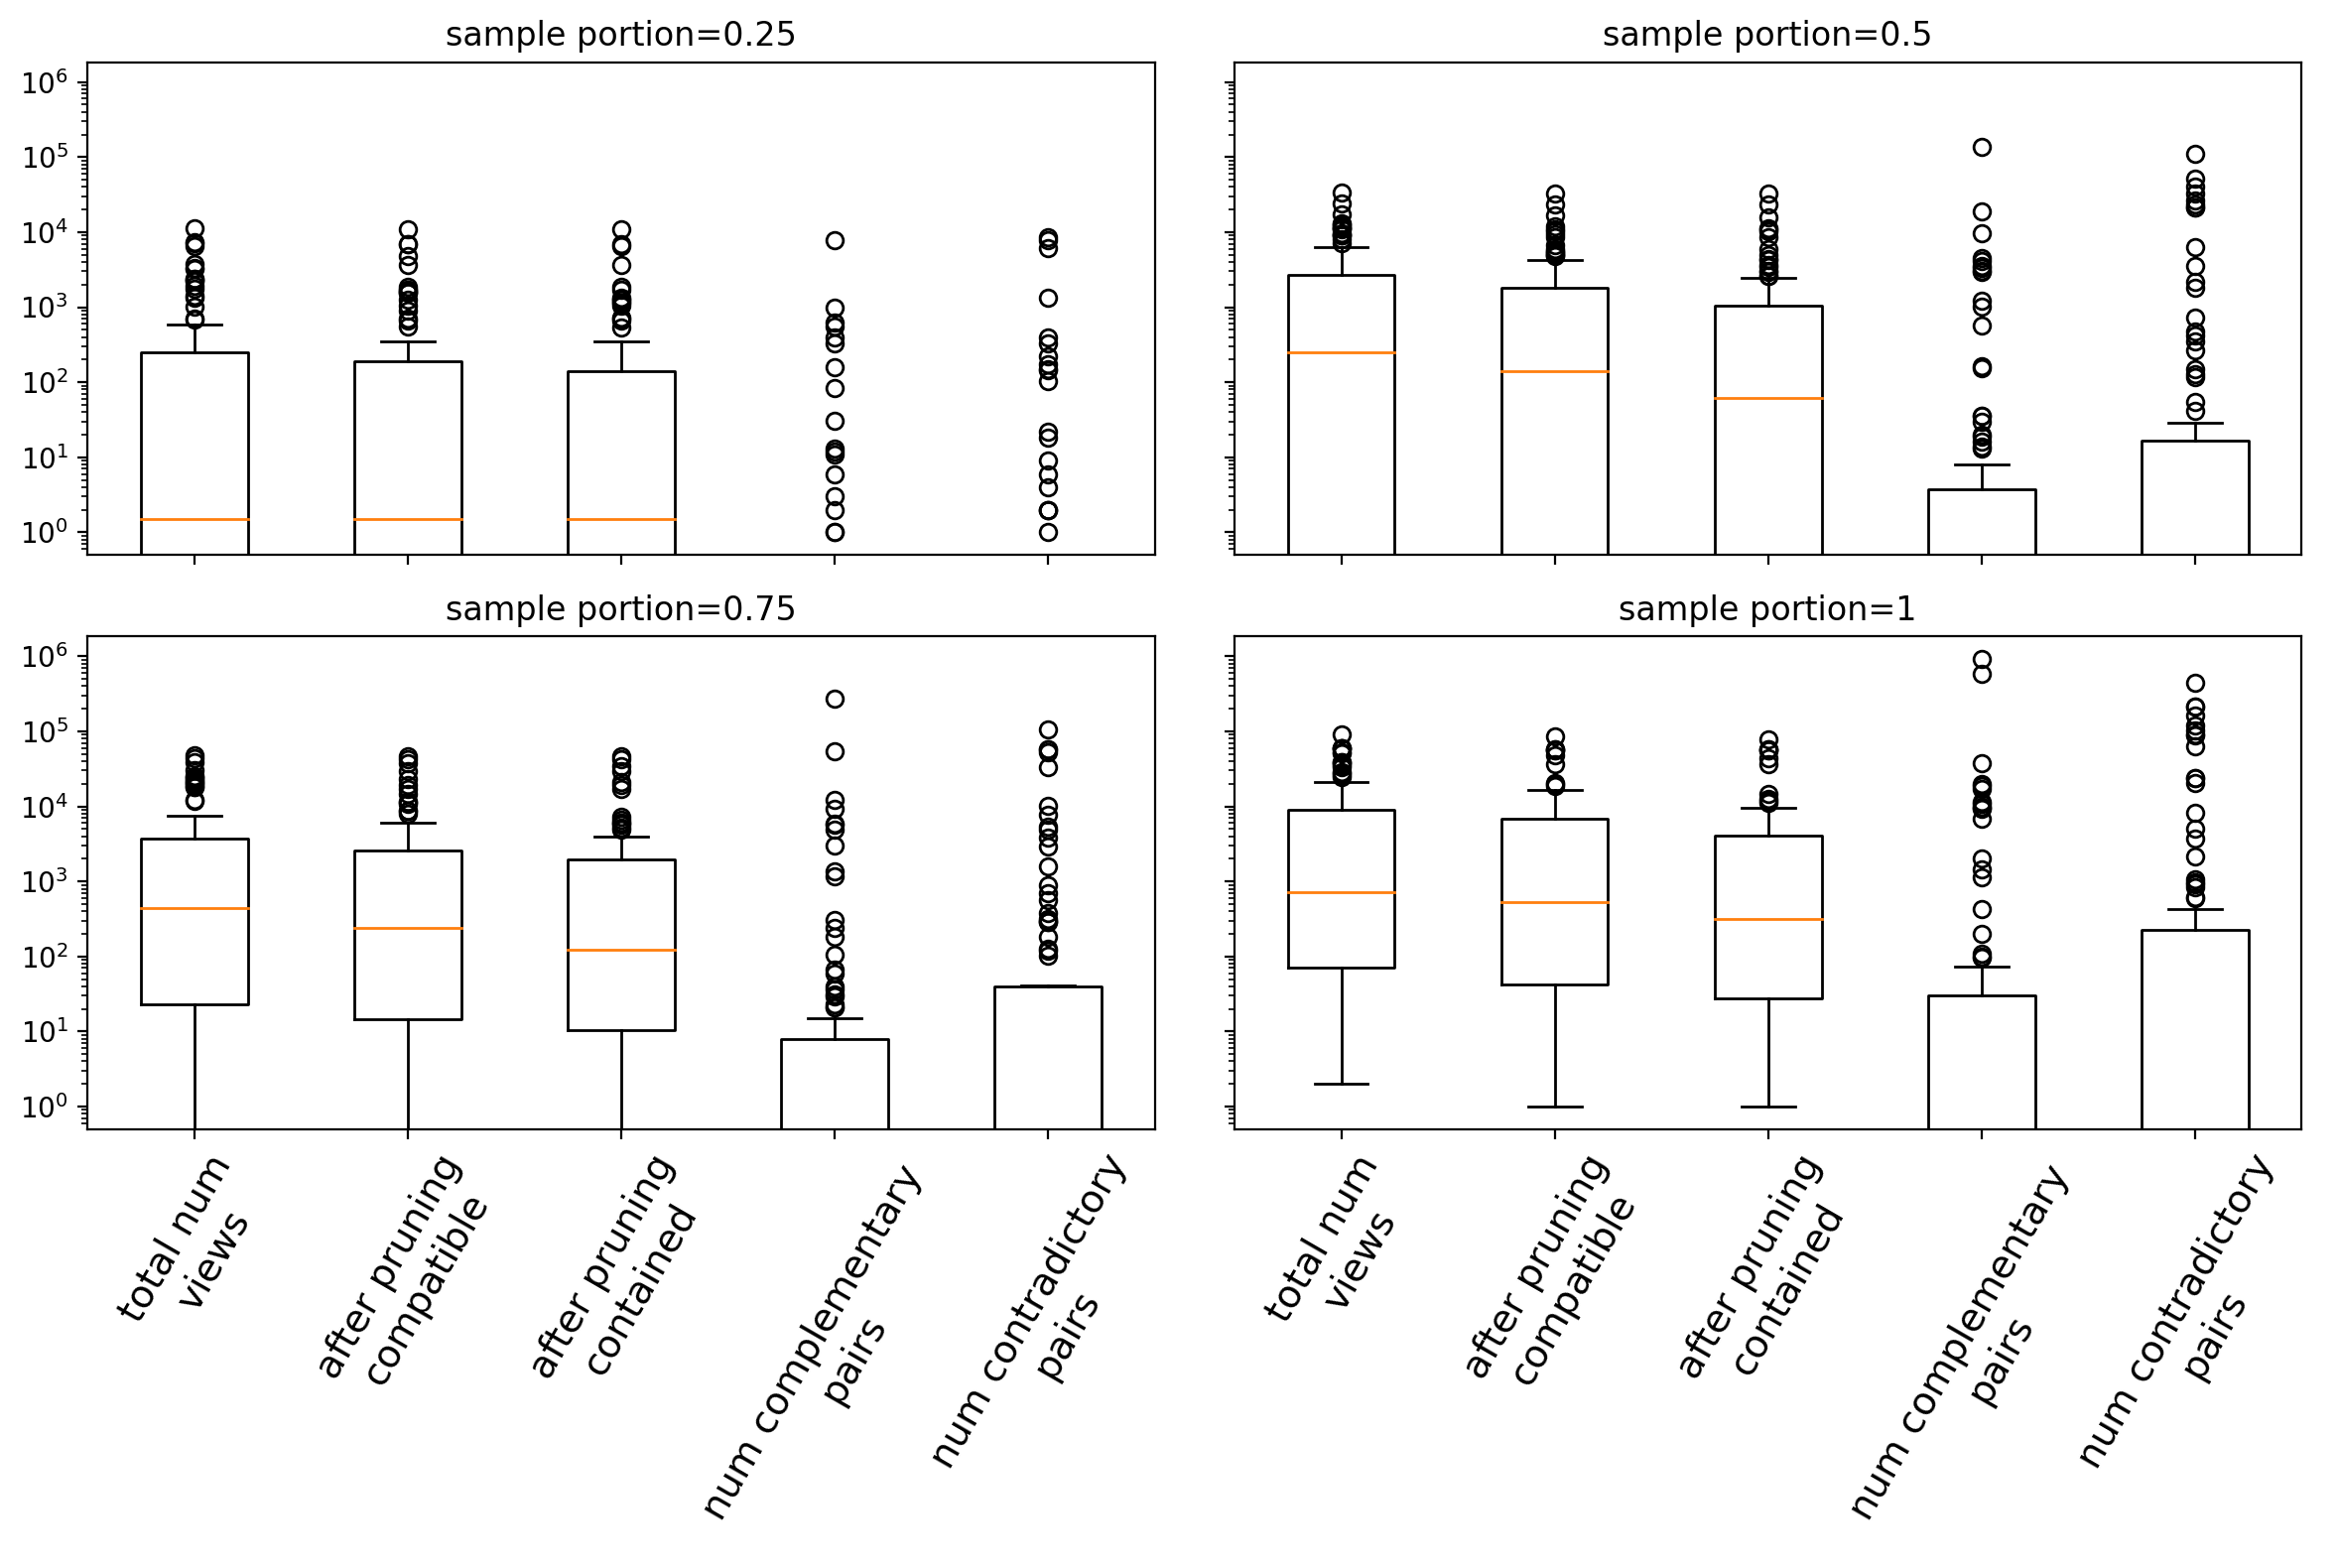

In [192]:
fig, axs = plt.subplots(2, 2, sharex=True, sharey=True)

to_plot_list = []

for i, sample_portion in enumerate(sample_portion_list):
    num_views = results[:, i, 0]
    num_views_after_pruning_compatible = results[:, i, 2]
    num_views_after_pruning_contained = results[:, i, 3]
    num_complementary_pairs = results[:, i, 4]
    num_contradictory_pairs = results[:, i, 5]
    to_plot = np.array(
        [num_views, num_views_after_pruning_compatible, num_views_after_pruning_contained, num_complementary_pairs,
         num_contradictory_pairs]).transpose()
    to_plot_list.append(to_plot)
    # print(to_plot.shape)

axs[0, 0].boxplot(to_plot_list[0])
axs[0, 0].set_title("sample portion=0.25")
axs[0, 1].boxplot(to_plot_list[1])
axs[0, 1].set_title("sample portion=0.5")
axs[1, 0].boxplot(to_plot_list[2])
axs[1, 0].set_title("sample portion=0.75")
axs[1, 1].boxplot(to_plot_list[3])
axs[1, 1].set_title("sample portion=1")

# for ax in axs.flat:
#     ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.set_yscale("log")
    ax.set_xticks([1, 2, 3, 4, 5], ["total num\nviews", "after pruning\ncompatible", "after pruning\ncontained",
                                    "num complementary \npairs", "num contradictory\npairs"], rotation=60, fontsize=14)
    # ax.yticks(fontsize=14)
    # ax.label_outer()

# plt.yscale("log")
fig.tight_layout()
fig.savefig("num_views")
fig.show()

/var/folders/gh/y8h9y_296_z0q22mbml76b000000gn/T/ipykernel_2043/2023162808.py:37: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


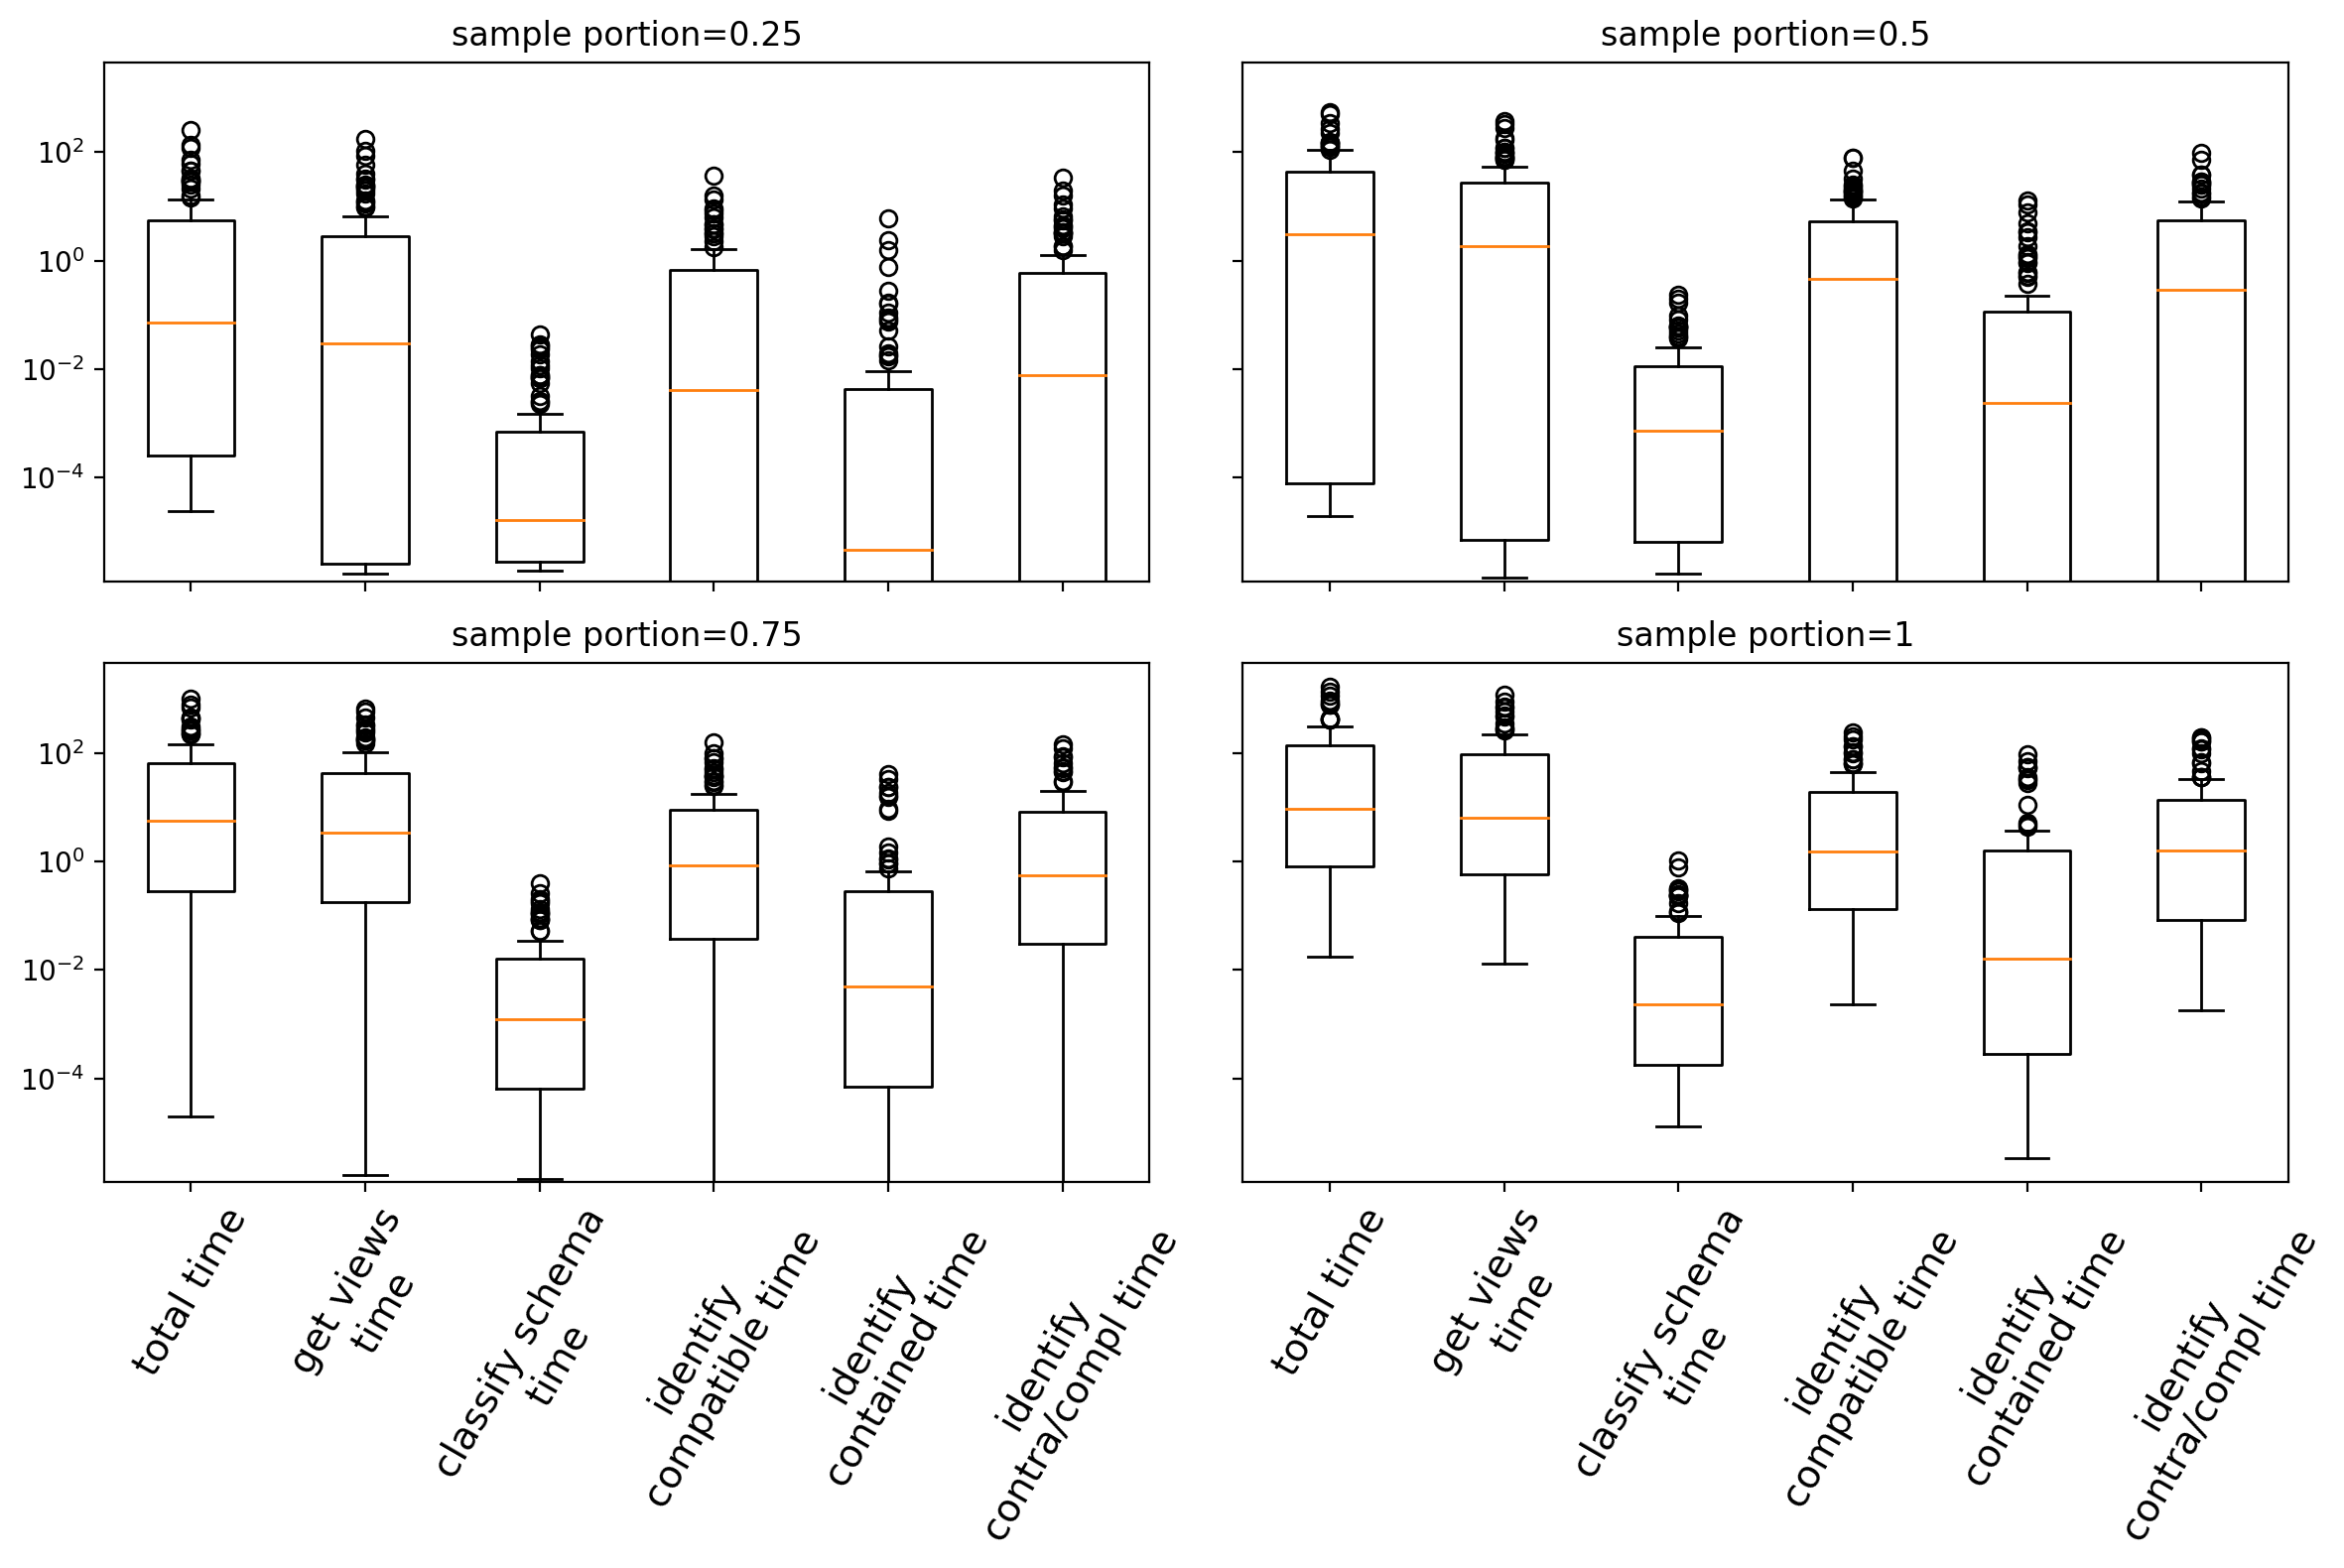

In [193]:
fig, axs = plt.subplots(2, 2, sharex=True, sharey=True)

to_plot_list = []

for i, sample_portion in enumerate(sample_portion_list):
    total_time = times[:, i, 0]
    get_df_time = times[:, i, 1]
    classify_per_table_schema_time = times[:, i, 2]
    total_identify_c1_time = times[:, i, 3]
    total_identify_c2_time = times[:, i, 4]
    find_complementary_contradictory_time_total = times[:, i, 6]
    to_plot = np.array([total_time, get_df_time, classify_per_table_schema_time,
                        total_identify_c1_time, total_identify_c2_time,
                        find_complementary_contradictory_time_total]).transpose()
    to_plot_list.append(to_plot)

axs[0, 0].boxplot(to_plot_list[0])
axs[0, 0].set_title("sample portion=0.25")
axs[0, 1].boxplot(to_plot_list[1])
axs[0, 1].set_title("sample portion=0.5")
axs[1, 0].boxplot(to_plot_list[2])
axs[1, 0].set_title("sample portion=0.75")
axs[1, 1].boxplot(to_plot_list[3])
axs[1, 1].set_title("sample portion=1")

# for ax in axs.flat:
#     ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.set_yscale("log")
    ax.set_xticks([1, 2, 3, 4, 5, 6],
                  ["total time", "get views\ntime", "classify schema\ntime", "identify\ncompatible time",
                   "identify\ncontained time", "identify\ncontra/compl time"], rotation=60, fontsize=14)
    # ax.label_outer()

fig.tight_layout()
fig.savefig("times")
fig.show()

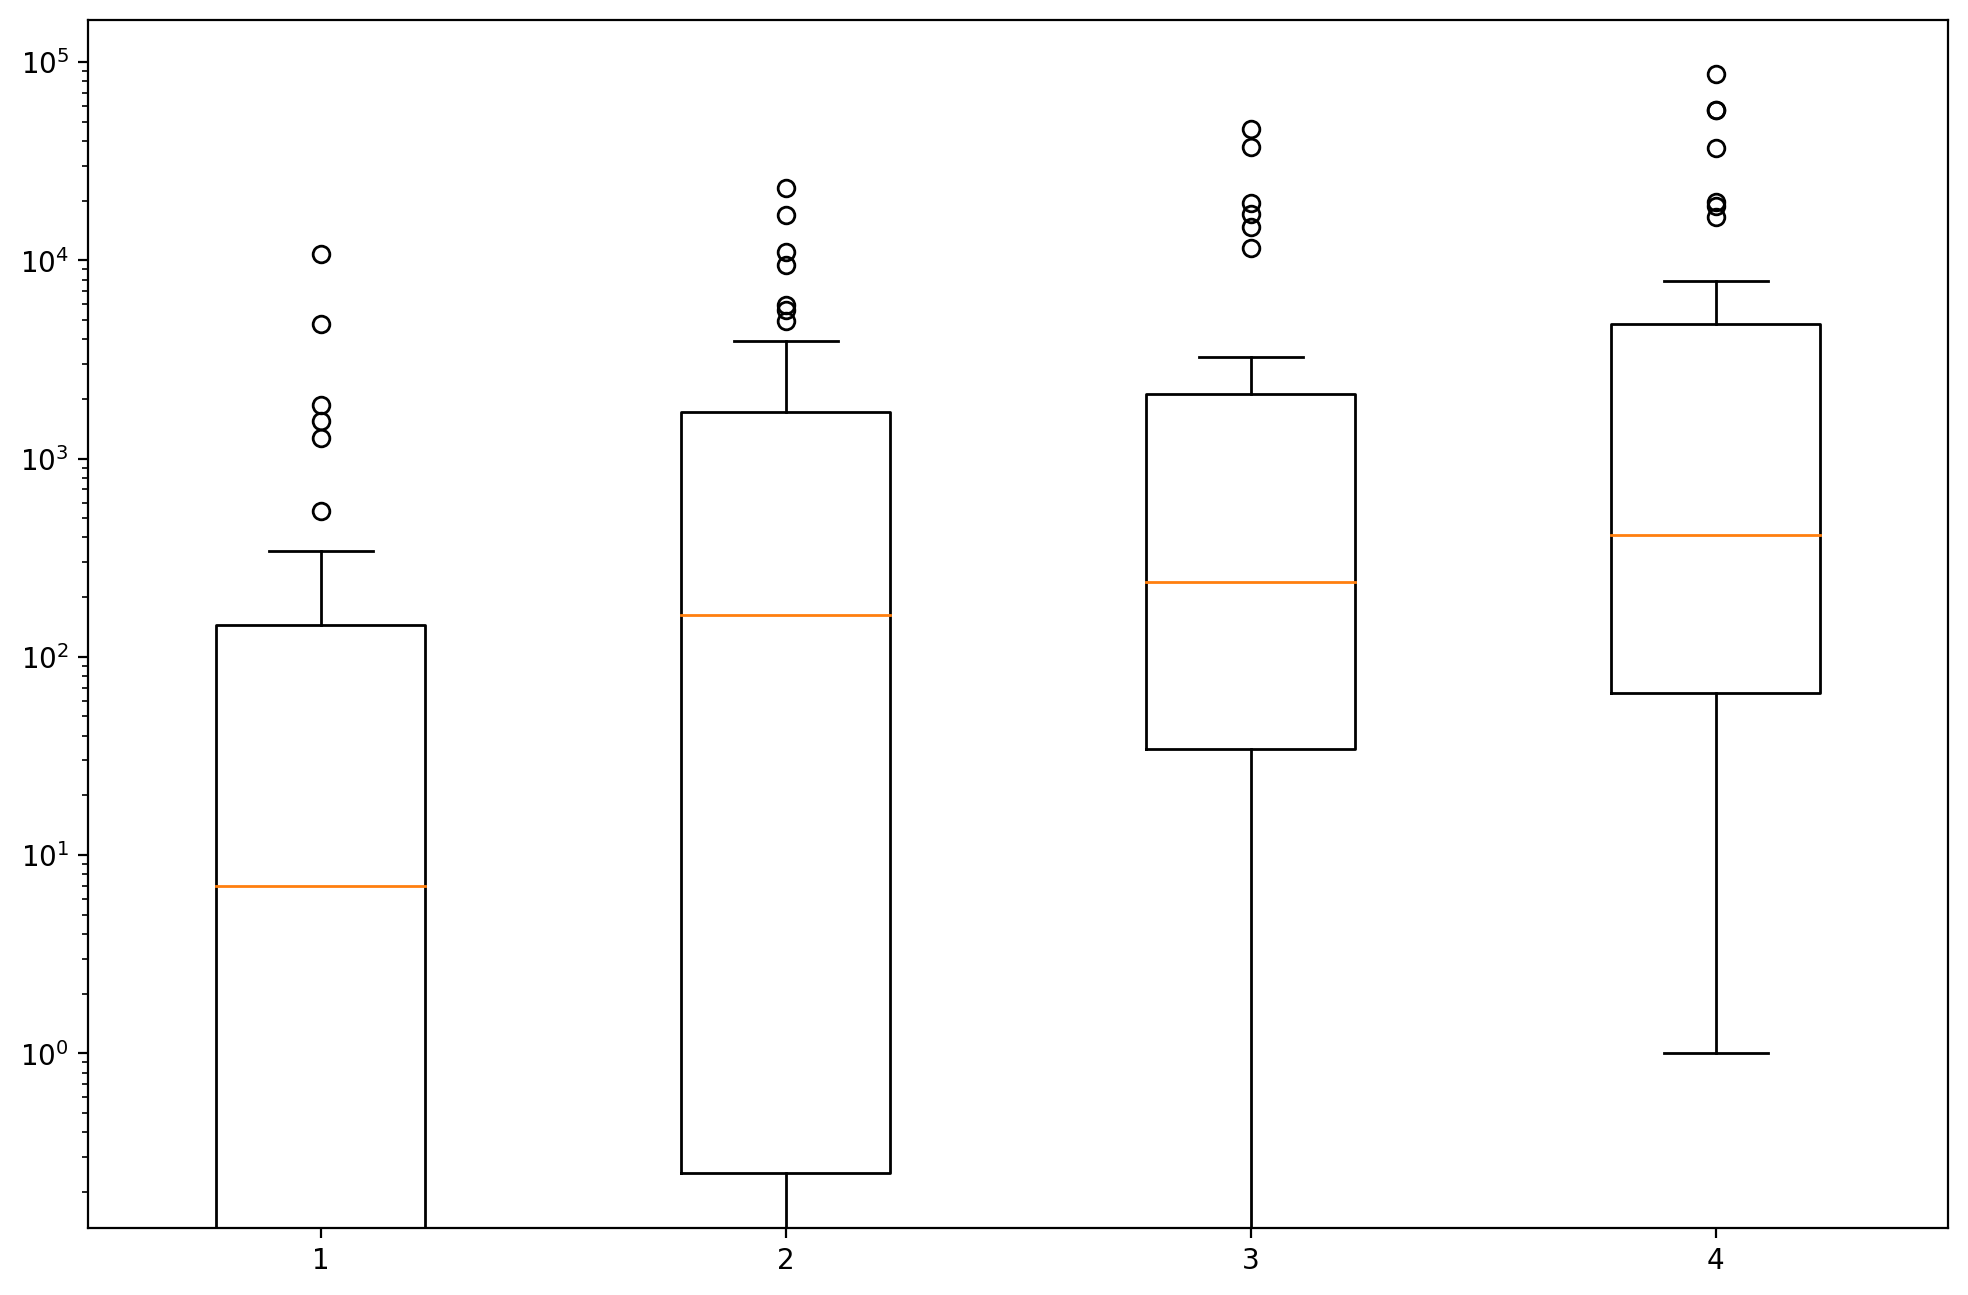

In [140]:
num_views_after_pruning_compatible = results[:, :, 2]
avg_num_views_after_pruning_compatible = np.average(num_views_after_pruning_compatible, axis=0)
std_num_views_after_pruning_compatible = np.std(num_views_after_pruning_compatible, axis=0)

# plt.bar(sample_portion_list, avg_num_views_after_pruning_compatible, yerr=std_num_views_after_pruning_compatible, width = 0.1, align='center')
plt.boxplot(num_views_after_pruning_compatible)
plt.yscale("log")
plt.show()

In [130]:
schema_groups_files = glob.glob("results/schema_groups_*.txt")
# print(schema_groups_files)

num_groups = []
for f in schema_groups_files:
    with open(f, "r") as file:
        lines = file.readlines()
        num_groups_list = []
        for line in lines:
            num = len(line.split())
            num_groups_list.append(num)
        num_groups.append(num_groups_list)
num_groups = np.array(num_groups)
num_groups

array([[  0,   0,   5,   5],
       [ 19,  31,  27,  32],
       [  1,   1,   2,   2],
       [  1,  16,  36, 100],
       [  0,   1,   0,   1],
       [  2,   7,   9,   9],
       [  3,   5,   7,   7],
       [  0,   0,   1,   1],
       [  0,   0,   1,   1],
       [ 14,  32,  41,  79],
       [ 27,  61,  68, 105],
       [  0,  10,   0,  10],
       [  6,  10,  13,  32],
       [ 37,  87, 114, 132],
       [  4,   4,   7,   7],
       [107, 215, 233, 340],
       [  0,   1,   1,   1],
       [  0,   1,   1,   1],
       [  0,   0,   1,   1],
       [ 19,  30,  33,  36],
       [ 20,  34,  54,  60],
       [  0,   0,  64,  70],
       [ 63, 438, 477, 951],
       [ 10,  15,  24,  27],
       [  3,   3,   5,   5],
       [  2,   5,   2,   8],
       [199, 404, 502, 625],
       [ 19,  48,  75,  96],
       [  0,   1,   1,   1],
       [  0,   0,   6,   7],
       [ 15,  35,  51,  63],
       [  0,   0,  10,  10],
       [  0,   9,   8,  10],
       [  6,  20,  19,  20],
       [  3,  

In [401]:
num_contradictions_1 = results[:, 3, 6]
(num_contradictions_1 >= 1).sum()

21

In [195]:
num_complementary_pairs_1 = results[:, 3, 4]
num_complementary_pairs_1

array([     0,     74,      5,     10,      0,      0,     11,      0,
            0,  18625,     98,  16908,   1140,      0,      1,      0,
            0,      0,      1,      0,      0,   9378,      0,     15,
        10805,     97,      0,      0, 577105,      0,  38093,     49,
            0,      6,      1,      0,      0,      3,   6770,      4,
            0,   2055,      0,      6,   9638,  19680,     25,      0,
           11,      0,      0,   1468,      0,      0,    198,      5,
           47,      0,      2,    423,      1,      0,      6,      0,
            1,      0,      0,      0,     31,      0,      0,      0,
            0,      0,      0,      0,   9897,      0,      0,      0,
            0,    108,      0,     39,      0,      3,      0,      0,
            0,      0,      0,     25,     29,      0,      0,      1,
        11409, 926523])

In [437]:
from math import comb

num_comparisons_contained = results[:, 3, 7]
total_num_views = results[:, 3, 0]
num_pairs = np.array([comb(n, 2) for n in total_num_views])
print(num_pairs)
print(num_comparisons_contained)
fractions = num_comparisons_contained / num_pairs
print(np.median(fractions), np.mean(fractions))

[    242556    1825005 1718943661    2985346   54763345   16402128
  754602976  567019650  729830115   25851645  219356985     113050
   14058253   40216996       1128     796953  114224055    1321125
     458403  405199278  351960246       6328   55677628      34980
    5984070       5886 1373273028 4055897145     192510      28680
    1282401     245350 1719881925     146070     243951      15225
   49945015   15783771   11474445  627057991    1321125          3
 1736401915   34865425   31027503 1269550855  766302526    1066530
 1736401915   27184251   23925903       8911   40892446]
[   117339     48614   4427557    273680   8195281      1283   1734347
  87154173   1859477   1224896     51994       378   1530226    365525
       157      1182   3343320     20875      7749   8579354  82818392
      3482   3370521      1023       917      5886      4224  97338026
     34104       293     25155    244650   5114522       180    243253
     10950   6957234     16385   3247469  18405018  

In [252]:
num_contradictory_pairs_1 = results[:, 3, 5]
total_num_comparisons_c34 = num_complementary_pairs_1 + num_contradictory_pairs_1
# num_contradictory_pairs_1
print(max(total_num_comparisons_c34))
print(max(num_complementary_pairs_1))
print(max(num_contradictory_pairs_1))
# (total_num_comparisons_c34 > 300000)
# total_num_comparisons_c34

927127
926523
440680


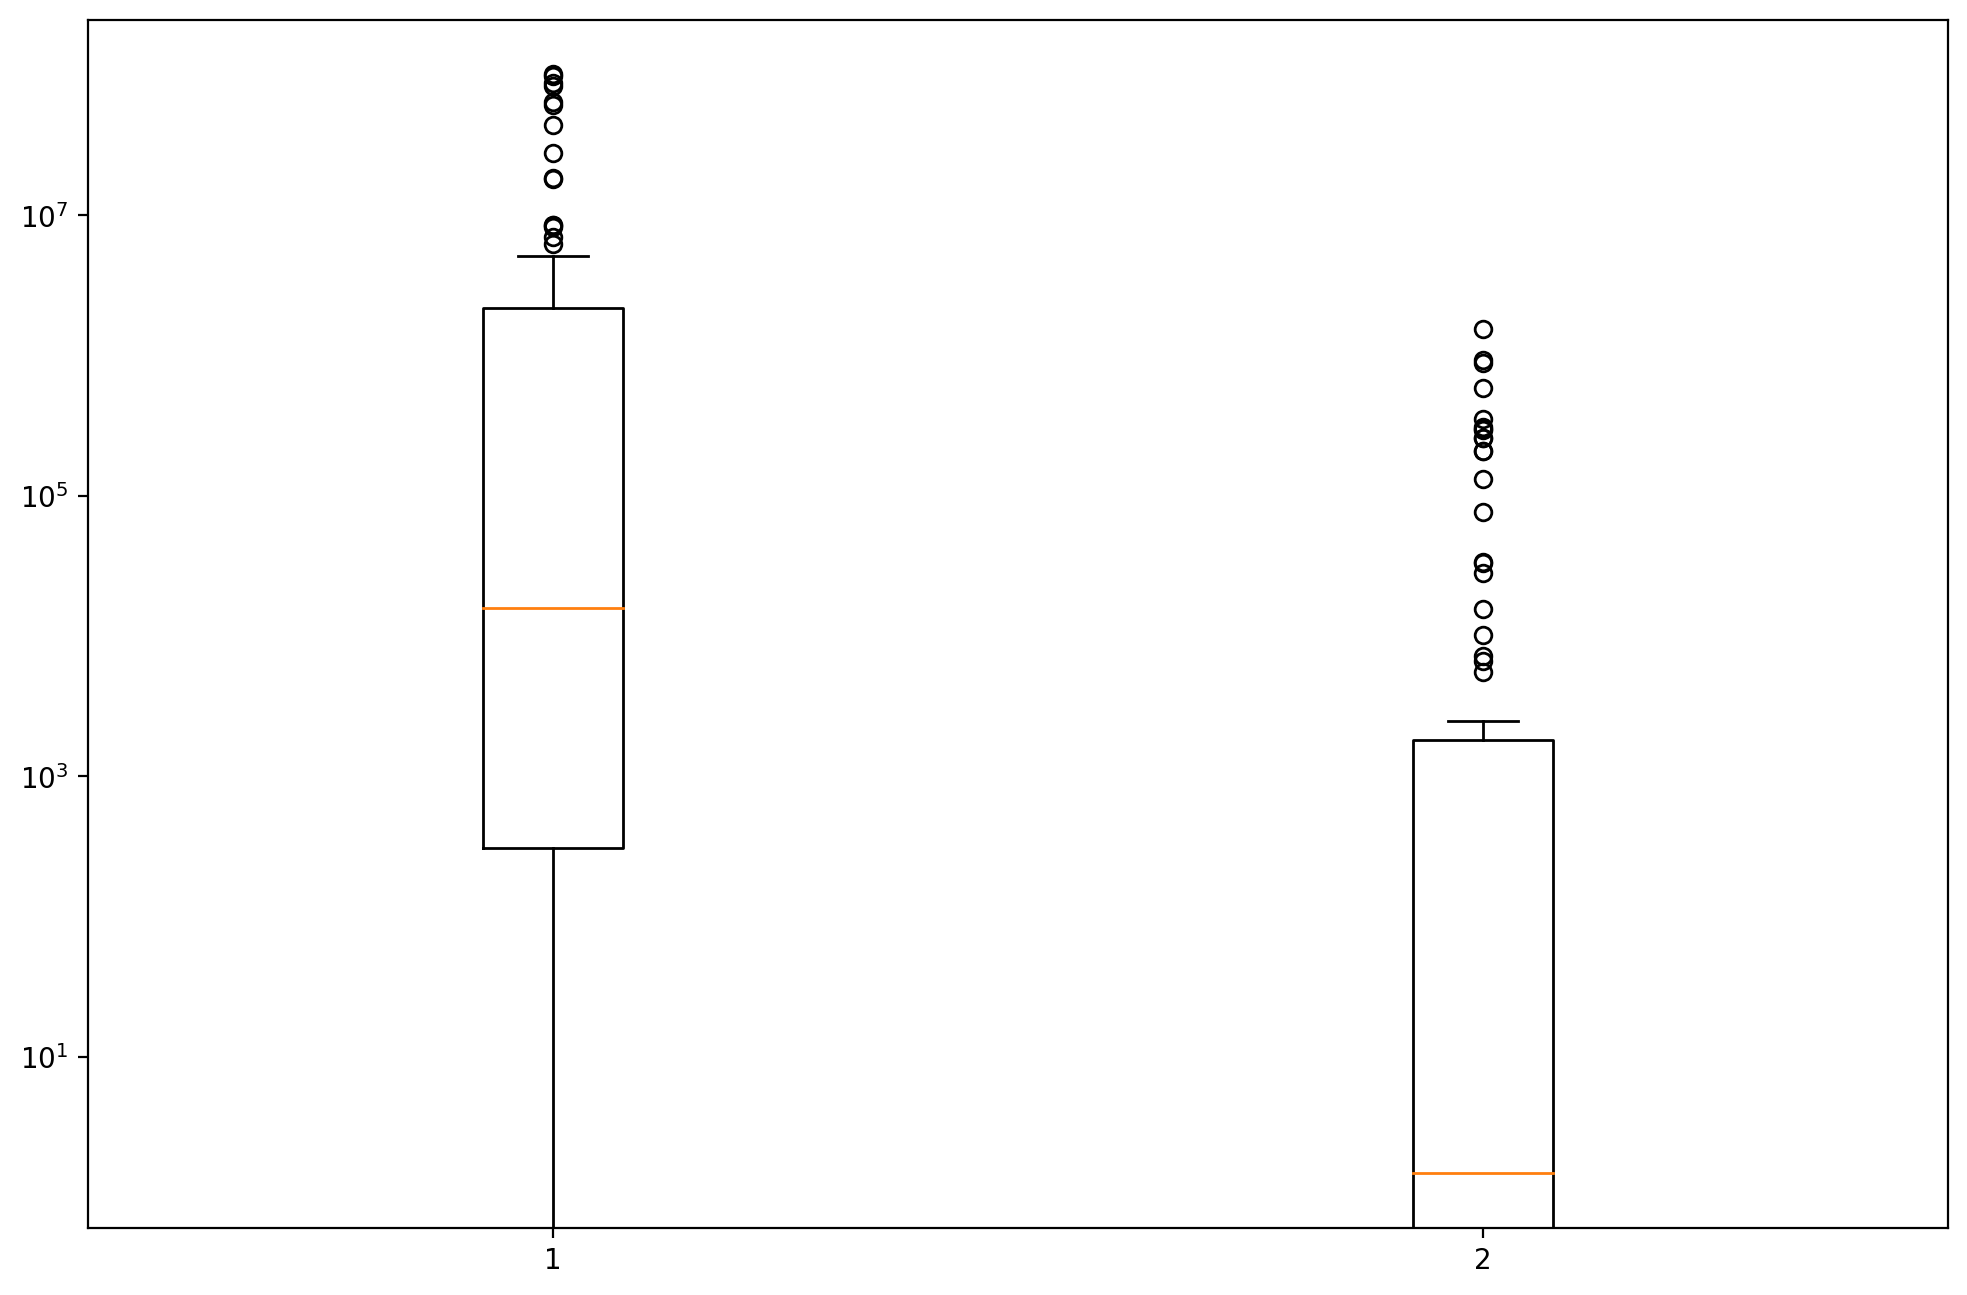

In [202]:
to_plot = np.array([num_comparisons_contained, total_num_comparisons_c34]).transpose()
plt.boxplot(to_plot)
plt.yscale("log")
plt.show()

In [322]:
to_plot_list = []
# to_plot_list2 = []

for i, sample_portion in enumerate(sample_portion_list):
    total_time = times[:, i, 0]
    get_df_time = times[:, i, 1]
    rest_time = total_time - get_df_time
    num_views = results[:, i, 0].astype(int)
    sample_portions = [sample_portion] * len(total_time)
    to_plot = np.array([sample_portions, total_time, get_df_time, rest_time, num_views]).transpose()
    to_plot_list.append(to_plot)
    # to_plot_list2.append(num_views)

combined = np.concatenate(to_plot_list)

In [323]:
import pandas as pd

df = pd.DataFrame(combined, columns=["sample portion", "total time", "get views time", "4c time", "num views"])
df["num views"] = df["num views"].astype(int)
df

,sample portion,total time,get views time,4c time,num views
0,0.25,28.700138,21.965496,6.734642,132
1,0.25,1.224051,0.773036,0.451014,49
2,0.25,0.025110,0.018956,0.006155,7223
3,0.25,11.149606,9.567572,1.582034,87
4,0.25,0.777317,0.561155,0.216162,149
...,...,...,...,...,...
207,1.00,215.120550,140.211955,74.908595,58931
208,1.00,93.049405,63.743727,29.305678,7374
209,1.00,3.833310,2.594001,1.239309,6918
210,1.00,7.915238,4.898071,3.017167,134


In [324]:
df = pd.melt(df, id_vars=["sample portion"],
             value_vars=["total time", "get views time", "4c time", "num views"])
df

,sample portion,variable,value
0,0.25,total time,28.700138
1,0.25,total time,1.224051
2,0.25,total time,0.025110
3,0.25,total time,11.149606
4,0.25,total time,0.777317
...,...,...,...
843,1.00,num views,58931.000000
844,1.00,num views,7374.000000
845,1.00,num views,6918.000000
846,1.00,num views,134.000000


/var/folders/gh/y8h9y_296_z0q22mbml76b000000gn/T/ipykernel_2043/4230448652.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(ax1.get_yticklabels(), fontdict={'weight': 'bold'})
/var/folders/gh/y8h9y_296_z0q22mbml76b000000gn/T/ipykernel_2043/4230448652.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(ax2.get_yticklabels(), fontdict={'weight': 'bold'})


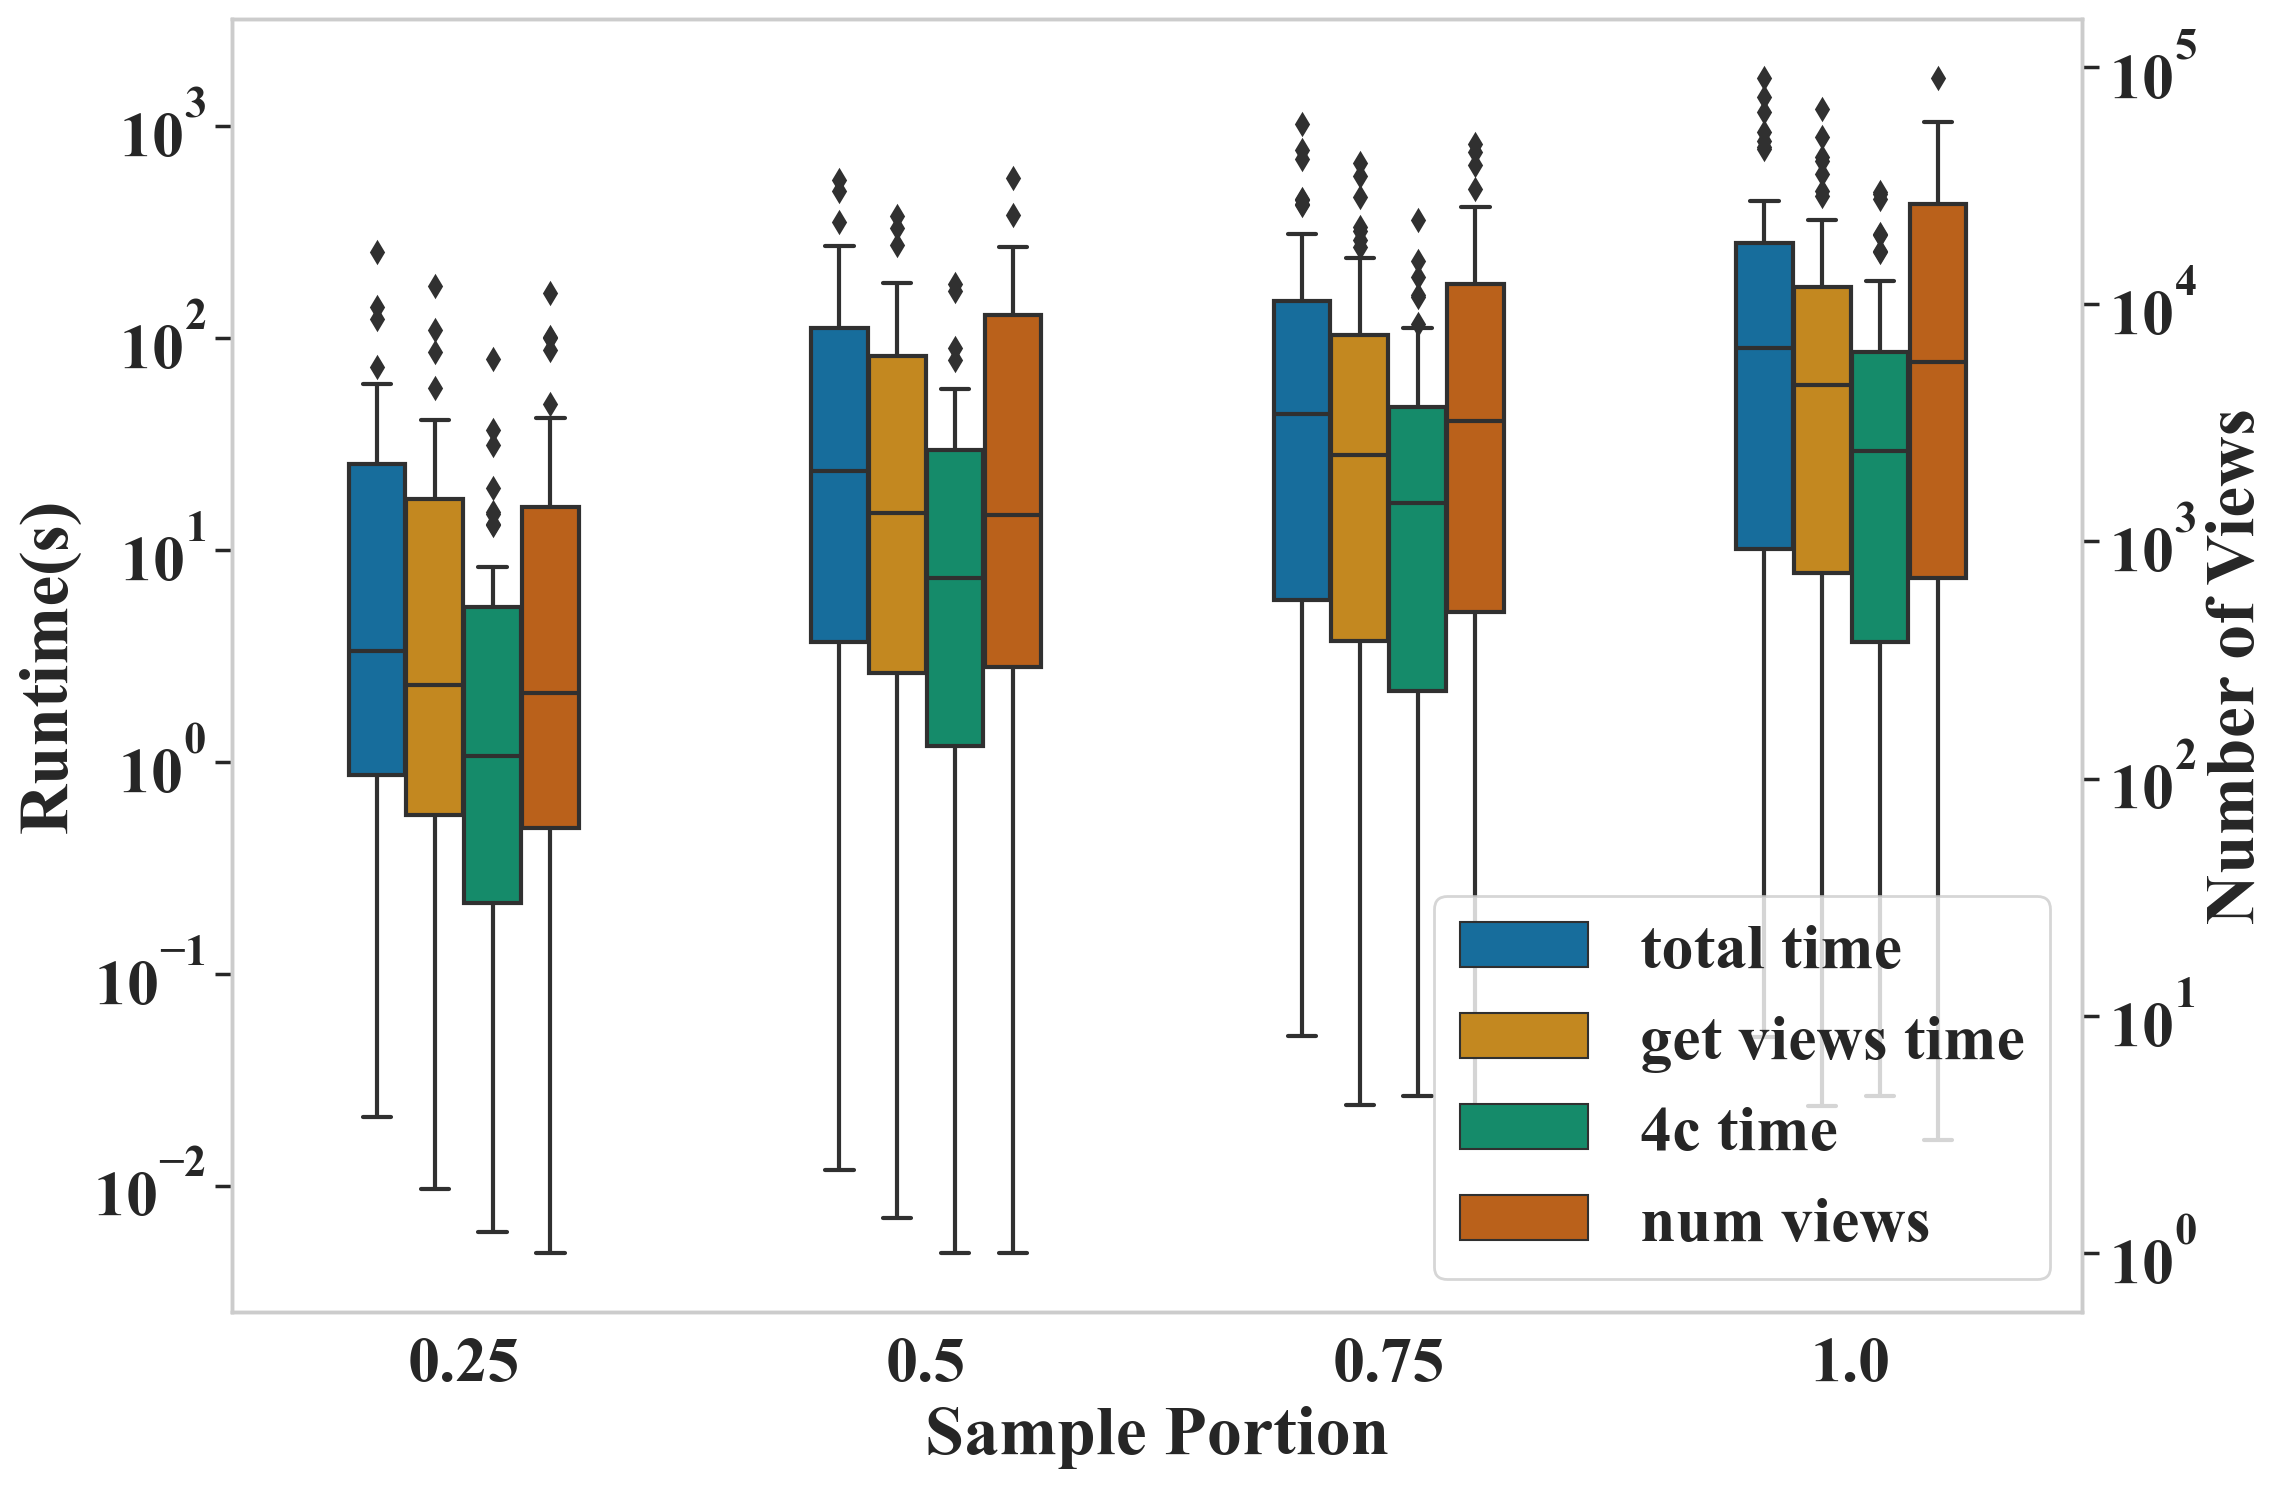

In [440]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set_theme(style="whitegrid", palette="colorblind", font="Times New Roman", font_scale=2.1)


# fig, ax1 = plt.subplots()
# sns.set(font_scale = 1.2)

ax1 = sns.boxplot(x="sample portion", y="value",
                  hue="variable",  #palette=["m", "g", 'b'],
                  hue_order=['total time', 'get views time', '4c time', np.nan],
                  data=df,
                  width=0.5)
# ax1.set_yticklabels([10**(-2), 10**(-1), 10**(1), 10**(0), 10**(1), 10**(2), 10**(3)], fontdict={'weight': 'bold'})
ax1.set_yticklabels(ax1.get_yticklabels(), fontdict={'weight': 'bold'})

ax1.set_yscale("log")
_ = ax1.set(xlabel="Sample Portion", ylabel="Runtime(s)")
# ax1.legend().set_title(None)
ax1.legend_.remove()

medians = df.groupby(["sample portion", "variable"])['value'].median()
# print(medians[0.25]["4c time"])

# medians1 = [str(np.round(num, 2)) for num in medians]
#
# ind = 0
# for tick in range(len(ax1.get_xticklabels())):
#     ax1.text(tick-.2, medians[ind+1]+1, medians1[ind+1],  horizontalalignment='center',  color='w', weight='semibold', size='x-small')
#     ax1.text(tick+.2, medians[ind]+1, medians1[ind], horizontalalignment='center', color='w', weight='semibold', size='x-small')
#     ind += 2


ax2 = ax1.twinx()
ax2 = sns.boxplot(x="sample portion", y="value",
                  hue="variable",  #palette=["m", "g", 'b'],
                  hue_order=[np.nan, np.nan, np.nan, "num views"],
                  data=df,
                  width=0.5)
# ax2.set_yticklabels([10**(0), 10**(1), 10**(2), 10**(3), 10**(4), 10**(5)], fontdict={'weight': 'bold'})
ax2.set_yticklabels(ax2.get_yticklabels(), fontdict={'weight': 'bold'})

ax2.set_yscale("log")
_ = ax2.set(ylabel="Number of Views")
ax2.legend().set_title(None)
plt.legend(labels=["total time", "get views time", "4c time", "num views"], loc="lower right",
           prop={'weight': 'bold'})
           # loc='upper left', bbox_to_anchor=(-0.01, 1.02))
# ax2.legend_.remove()
ax1.grid(False)
ax2.grid(False)


ax1.set_xlabel(ax1.get_xlabel(), fontdict={'weight': 'bold'})
ax1.set_ylabel(ax1.get_ylabel(), fontdict={'weight': 'bold'})
ax2.set_xlabel(ax2.get_xlabel(), fontdict={'weight': 'bold'})
ax2.set_ylabel(ax2.get_ylabel(), fontdict={'weight': 'bold'})
ax1.set_xticklabels(ax1.get_xticklabels(), fontdict={'weight': 'bold'})
ax2.set_xticklabels(ax2.get_xticklabels(), fontdict={'weight': 'bold'})

ax1.minorticks_off()
ax2.minorticks_off()


plt.tight_layout()
plt.savefig("figures/scalability1.pdf")

# sns.despine(offset=10, trim=True)

In [425]:
i=3
total_time = times[:, i, 0]
get_df_time = times[:, i, 1]
four_c_time = total_time - get_df_time
classify_per_table_schema_time = times[:, i, 2]
total_identify_c1_time = times[:, i, 3]
total_identify_c2_time = times[:, i, 4]
find_complementary_contradictory_time_total = times[:, i, 6]
# to_plot = np.array([four_c_time, classify_per_table_schema_time,
#                     total_identify_c1_time, total_identify_c2_time,
#                     find_complementary_contradictory_time_total]).transpose()
to_plot = pd.DataFrame({"4c total runtime": four_c_time,
                        "classify\nschema time": classify_per_table_schema_time,
                        "hashing + identify\ncompatible time": total_identify_c1_time,
                        "identify\ncontained time": total_identify_c2_time,
                        "identify\ncontra/compl time": find_complementary_contradictory_time_total})
to_plot

,4c total runtime,classify\nschema time,hashing + identify\ncompatible time,identify\ncontained time,identify\ncontra/compl time
0,79.774039,0.099870,40.806685,5.169521,33.204522
1,30.224468,0.017770,14.101537,0.673308,14.856969
2,7.168997,0.005131,2.943887,0.008290,4.155398
3,32.858556,0.081386,31.766347,0.434233,0.228936
4,0.974907,0.001120,0.682041,0.001239,0.285261
5,306.940130,0.313473,131.263471,1.659029,165.525387
6,10.137308,0.007804,4.487096,0.165246,5.345248
7,8.008589,0.018223,7.904170,0.008822,0.024557
8,184.997202,0.175477,65.316020,71.389704,46.074255
9,137.286759,0.235679,64.982451,1.543657,69.159674


/var/folders/gh/y8h9y_296_z0q22mbml76b000000gn/T/ipykernel_2043/1373988849.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontdict={'weight': 'bold'})


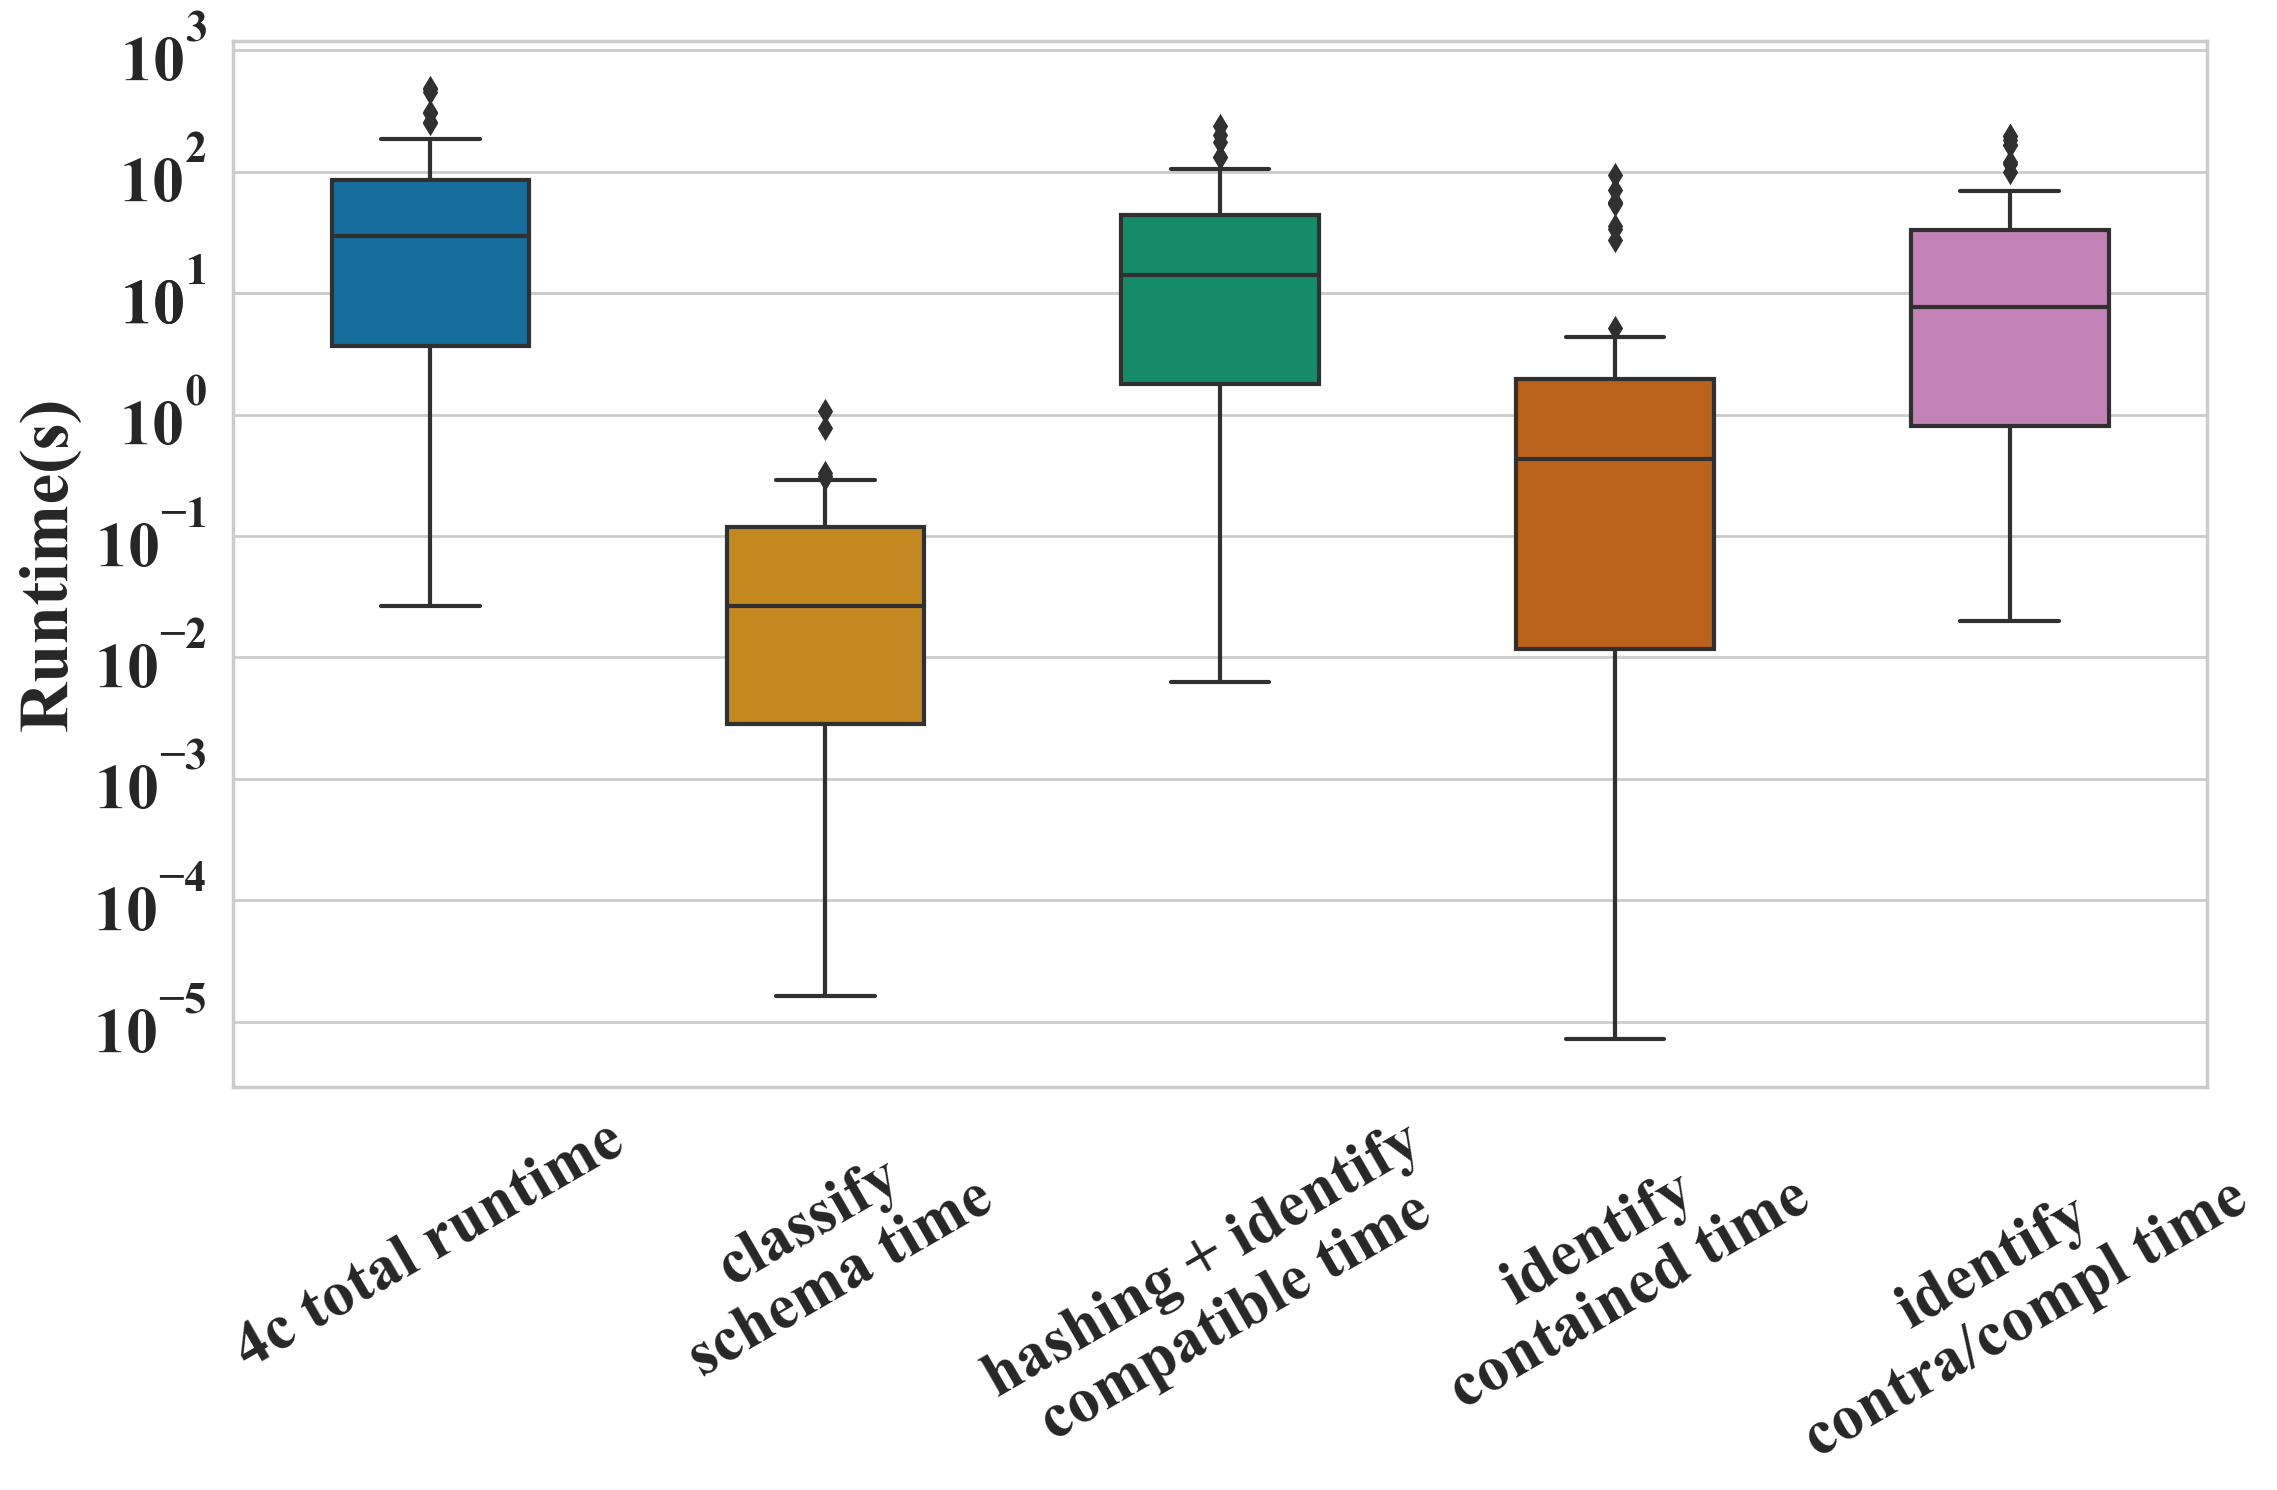

In [441]:
ax = sns.boxplot(data=to_plot, width=0.5)

ax.set_yticklabels(ax.get_yticklabels(), fontdict={'weight': 'bold'})

ax.set_yscale("log")

# ax.set_yticks([10**(-5), 10**(-4), 10**(-3), 10**(-2), 10**(-1), 10**(1), 10**(0), 10**(1), 10**(2), 10**(3)])

ax.set_xticklabels(ax.get_xticklabels(), rotation = 30, fontdict={'weight': 'bold'})
ax.set_ylabel("Runtime(s)", fontdict={'weight': 'bold'})

ax.set_yticks([10**(-5), 10**(-4), 10**(-3), 10**(-2), 10**(-1), 10**(1), 10**(0), 10**(1), 10**(2), 10**(3)], ontdict={'weight': 'bold'})


plt.tight_layout()
plt.savefig("figures/scalability2.pdf", dpi=300)
plt.show()